**Stanford car dataset Classification**

We have to make a model that can tell the difference between cars by type or colour? Which cars are manufactured by Tesla vs BMW?

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms

import time
import os
import PIL.Image as Image
from IPython.display import display

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
print(torch.cuda.get_device_name(device))

cuda:0
Tesla P100-PCIE-16GB


My work approach:: I used pytorch.imageloader becuase it directly loads dataset from given path like input/flower_data/train or input/flower_data/valid. Earlier i tried to load it using numpy/pandas, then i need to write code for making train and valid set, each having images of 196 categories with proper labeling. Like.. 1 folder will have all images inside 1 floder and label as 1, which we will replace with name(help from json cat_name). But, using pytorch, it was easy to do so with only few lines of code.

Algoritm Optimization:: We iincreased model accuracy by changing parameters like epoc.We changed epoc from 3 to 9.Accurancy increased slowly slowly.

Then we pre-process the dataset, using pytorch, rotate,resize , normailze etc methods.

Algorithm used for this image classification:: Transfer learning becuase making model from scratch would be very complex and computation expensive, would require lot of time. Transfer learning allows us to train deep networks using significantly less data then we would need if we had to train from scratch. In recent years, a number of models have been created for reuse in computer vision problems. Using these pre-trained models is known as transfer learning These pre-trained models allow others to quickly obtain cutting edge results in computer vision without needing the large amounts of compute power, time, and patience in finding the right training technique to optimize the weights. 

In [2]:
dataset_dir = "../input/car_data/car_data/"


In [3]:
indices = np.arange(8144)
np.random.shuffle(indices)
train_tfms = transforms.Compose([transforms.Resize((400, 400)),
                                 transforms.RandomHorizontalFlip(),
                                 transforms.RandomRotation(15),
                                 transforms.ToTensor(),
                                 transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
val_tfms = transforms.Compose([transforms.Resize((400, 400)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
test_tfms = transforms.Compose([transforms.Resize((400, 400)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


train_loader = torch.utils.data.DataLoader(dataset = torchvision.datasets.ImageFolder(root=dataset_dir+"train", transform = train_tfms),
batch_size=32, shuffle=False, sampler=torch.utils.data.SubsetRandomSampler(indices[:7500]))


val_loader =torch.utils.data.DataLoader(dataset = torchvision.datasets.ImageFolder(root=dataset_dir+"train", transform = val_tfms),
batch_size=32, shuffle=False, sampler=torch.utils.data.SubsetRandomSampler(indices[7500:]))


dataset2 = torchvision.datasets.ImageFolder(root=dataset_dir+"test", transform = test_tfms)
testloader = torch.utils.data.DataLoader(dataset2, batch_size = 32, shuffle=False, num_workers = 2)

In [4]:
# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
print(images[1].shape)

torch.Size([3, 400, 400])


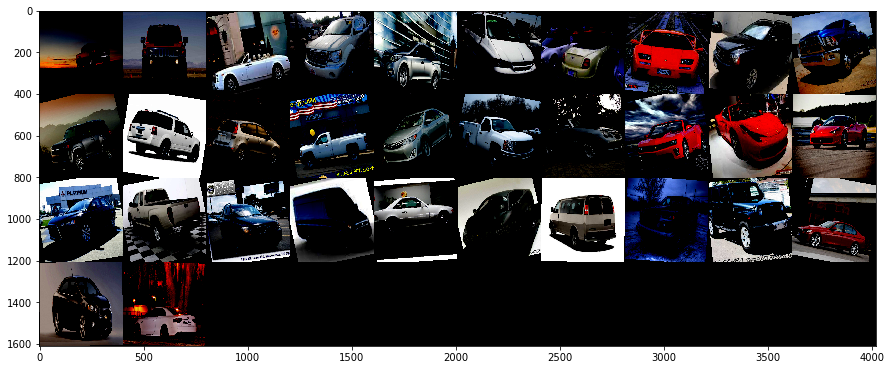

In [5]:
 grid = torchvision.utils.make_grid(images, nrow=10)
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))


In [6]:
train_dir = "../input/car_data/car_data/train"
#os.listdir(train_dir)
os.listdir(train_dir + '/' + 'Acura ZDX Hatchback 2012')

['03308.jpg',
 '05349.jpg',
 '00244.jpg',
 '05197.jpg',
 '05077.jpg',
 '07061.jpg',
 '07169.jpg',
 '04608.jpg',
 '06158.jpg',
 '07833.jpg',
 '00236.jpg',
 '03790.jpg',
 '01105.jpg',
 '00425.jpg',
 '04252.jpg',
 '01537.jpg',
 '02438.jpg',
 '01901.jpg',
 '04825.jpg',
 '06518.jpg',
 '01322.jpg',
 '05386.jpg',
 '02359.jpg',
 '06644.jpg',
 '00320.jpg',
 '07351.jpg',
 '06480.jpg',
 '04085.jpg',
 '04631.jpg',
 '02671.jpg',
 '06269.jpg',
 '01468.jpg',
 '07769.jpg',
 '00912.jpg',
 '03316.jpg',
 '01706.jpg',
 '06309.jpg',
 '01416.jpg',
 '06603.jpg']

In [7]:
train_dir = "../input/car_data/car_data/train"
test_dir = "../input/car_data/car_data/test"
os.listdir(train_dir)
#Dictionary that has name of car class as key and image name as its values
car_names_train = {}

for i in os.listdir(train_dir):
    #print()
    car_names_train[i] = os.listdir(train_dir + '/' + i)
car_names_train

{'Acura ZDX Hatchback 2012': ['03308.jpg',
  '05349.jpg',
  '00244.jpg',
  '05197.jpg',
  '05077.jpg',
  '07061.jpg',
  '07169.jpg',
  '04608.jpg',
  '06158.jpg',
  '07833.jpg',
  '00236.jpg',
  '03790.jpg',
  '01105.jpg',
  '00425.jpg',
  '04252.jpg',
  '01537.jpg',
  '02438.jpg',
  '01901.jpg',
  '04825.jpg',
  '06518.jpg',
  '01322.jpg',
  '05386.jpg',
  '02359.jpg',
  '06644.jpg',
  '00320.jpg',
  '07351.jpg',
  '06480.jpg',
  '04085.jpg',
  '04631.jpg',
  '02671.jpg',
  '06269.jpg',
  '01468.jpg',
  '07769.jpg',
  '00912.jpg',
  '03316.jpg',
  '01706.jpg',
  '06309.jpg',
  '01416.jpg',
  '06603.jpg'],
 'Dodge Caravan Minivan 1997': ['05752.jpg',
  '07565.jpg',
  '02956.jpg',
  '02409.jpg',
  '05871.jpg',
  '01261.jpg',
  '03681.jpg',
  '02389.jpg',
  '05102.jpg',
  '01384.jpg',
  '07474.jpg',
  '07782.jpg',
  '04847.jpg',
  '07378.jpg',
  '06804.jpg',
  '05888.jpg',
  '03557.jpg',
  '05500.jpg',
  '03529.jpg',
  '03646.jpg',
  '03336.jpg',
  '08105.jpg',
  '03384.jpg',
  '04170.jp

In [8]:
for i in os.listdir(test_dir):
    #print()
    car_names_test[i] = os.listdir(test_dir + '/' + i)
car_names_test

NameError: name 'car_names_test' is not defined

In [9]:
#Code to create two lists for class name and image directories corresponding to it
car_images_ls = []
car_names_ls = []
car_classes = []
car_directories = []

for i in car_names_train:
    car_classes.append(i)

for i,j in enumerate(car_names_train.values()):
    for img in j:
        car_images_ls.append(img)
        car_names_ls.append(car_classes[i])
        
        
for i in range(len(car_names_ls)):
    car_directories.append(train_dir + '/' + car_names_ls[i] + '/' + car_images_ls[i])
    
car_images_ls[1]

'05349.jpg'

In [10]:
def train_model(model_ft, criterion, optimizer, scheduler, n_epochs = 5):
    
    losses = []
    accuracies = []
    val_accuracies = []
    # set the model to train mode initially
    model_ft.train()
    for epoch in range(n_epochs):
        since = time.time()
        running_loss = 0.0
        running_correct = 0.0
        for i, data in enumerate(train_loader, 0):

            # get the inputs and assign them to cuda
            inputs, labels = data
            #inputs = inputs.to(device).half() # uncomment for half precision model
            inputs = inputs.to(device)
            labels = labels.to(device)
            optimizer.zero_grad()
            
            # forward + backward + optimize
            outputs = model_ft(inputs)
            _, predicted = torch.max(outputs.data, 1)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
             # calculate the loss/acc later
            running_loss += loss.item()
            running_correct += (labels==predicted).sum().item()

        epoch_duration = time.time()-since
        epoch_loss = running_loss/len(train_loader)
        epoch_acc = 100/32*running_correct/len(train_loader)
        print("Epoch %s, duration: %d s, loss: %.4f, acc: %.4f" % (epoch+1, epoch_duration, epoch_loss, epoch_acc))
        
        losses.append(epoch_loss)
        accuracies.append(epoch_acc)
        
        # switch the model to eval mode to evaluate on validation data
        model_ft.eval()
        val_acc = eval_model(model_ft)
        val_accuracies.append(val_acc)
        
        # re-set the model to train mode after validating
        model_ft.train()
        scheduler.step(val_acc)
        since = time.time()
    print('Finished Training')
    return model_ft, losses, accuracies, val_accuracies

In [11]:
def eval_model(model_ft):
    correct = 0.0
    total = 0.0
    with torch.no_grad():
        for i, data in enumerate(val_loader, 0):
            images, labels = data
            #images = images.to(device).half() # uncomment for half precision model
            images = images.to(device)
            labels = labels.to(device)
            
            outputs = model_ft(images)
            _, predicted = torch.max(outputs.data, 1)
            
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_acc = 100.0 * correct / total
    print('Accuracy of the network on the validation images: %d %%' % (
        val_acc))
    return val_acc

In [12]:
model_ft = models.resnet34(pretrained=True)
num_ftrs = model_ft.fc.in_features

# replace the last fc layer with an untrained one (requires grad by default)
model_ft.fc = nn.Linear(num_ftrs, 196)
model_ft = model_ft.to(device)


criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_ft.parameters(), lr=0.01, momentum=0.9)


lrscheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', patience=3, threshold = 0.9)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /tmp/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 100061894.79it/s]


In [13]:
model_ft, training_losses, training_accs, val_accs = train_model(model_ft, criterion, optimizer, lrscheduler, n_epochs=10)

Epoch 1, duration: 202 s, loss: 4.0715, acc: 14.4548
Accuracy of the network on the validation images: 35 %
Epoch 2, duration: 190 s, loss: 1.7700, acc: 54.5213
Accuracy of the network on the validation images: 50 %
Epoch 3, duration: 191 s, loss: 0.9327, acc: 75.1463
Accuracy of the network on the validation images: 65 %
Epoch 4, duration: 191 s, loss: 0.5490, acc: 84.9202
Accuracy of the network on the validation images: 73 %
Epoch 5, duration: 190 s, loss: 0.3375, acc: 91.0771
Accuracy of the network on the validation images: 77 %
Epoch 6, duration: 190 s, loss: 0.2392, acc: 93.6968
Accuracy of the network on the validation images: 80 %
Epoch 7, duration: 190 s, loss: 0.1651, acc: 95.7846
Accuracy of the network on the validation images: 84 %
Epoch 8, duration: 189 s, loss: 0.1220, acc: 96.8484
Accuracy of the network on the validation images: 84 %
Epoch 9, duration: 189 s, loss: 0.0602, acc: 98.6569
Accuracy of the network on the validation images: 88 %
Epoch 10, duration: 190 s, l

In [14]:
colnames=['Name'] 
user1 = pd.read_csv('../input/names.csv',names=colnames)
dict1={}
for i in user1.index:
    dict1[i]=user1['Name'][i]
    
dict1

NameError: name 'pd' is not defined

In [15]:
###Testing with random validation samples###
with torch.no_grad():
    model_ft.eval()
    model_ft.eval()
    print ("Evaluating random validation samples:")
    val_data, val_targets = next(iter(val_loader))
    outputs = model_ft(val_data[0].unsqueeze(0).to(device))
    _, pred = torch.max(outputs, 1)
    
    print ("Actual Class - {0}".format(dict1[int(val_targets[0]) ]))
    print ("Predicted Class - {0}".format(dict1[int(pred)]))

Evaluating random validation samples:


NameError: name 'dict1' is not defined

Text(0.5, 1.0, 'Val acc')

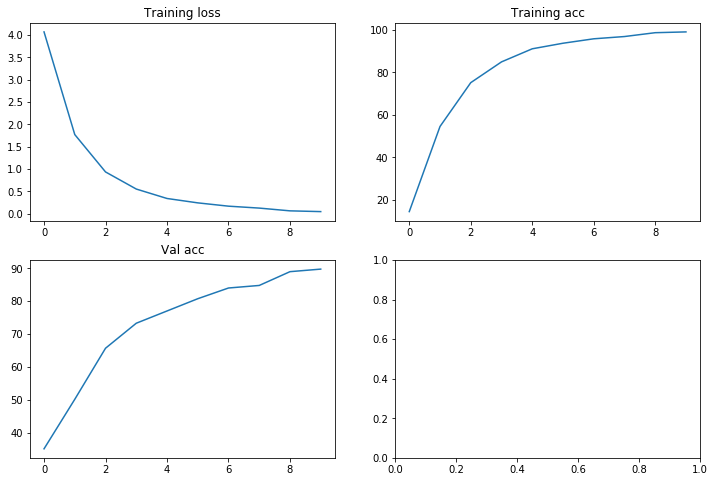

In [16]:
# plot the stats
f, axarr = plt.subplots(2,2, figsize = (12, 8))
axarr[0, 0].plot(training_losses)
axarr[0, 0].set_title("Training loss")
axarr[0, 1].plot(training_accs)
axarr[0, 1].set_title("Training acc")
axarr[1, 0].plot(val_accs)

axarr[1, 0].set_title("Val acc")

In [17]:
#Testing on Test loader.Getting list of image names and class labels.
labels1=[]
image_nm=[]
img_indx=0
with torch.no_grad():
    for i, (images, labels) in enumerate(testloader, 0):
        images = images.to(device)
        outputs = model_ft(images)
        _, predicted = torch.max(outputs.data, 1)
        #print(len(predicted))
        
        for j in range(len(predicted)):
                #print(idx_class_mapping[i.item()])
                labels1.append(int(predicted[j]) + 1)
                sample_fname, _ = testloader.dataset.samples[img_indx]
                img_indx+=1
                sample_fname_file=os.path.splitext(os.path.basename(sample_fname))[0]
                image_nm.append(sample_fname_file)
                #image_nm.append()
        
      #print("{}, {}\n".format(sample_fname[i], predicted[i].item())) 

In [18]:
#Making Dataframe for class labels and image names
predicted_df = pd.DataFrame(
    {'Image': image_nm,
     'Prediction': labels1     
    })

predicted_df.to_csv()

NameError: name 'pd' is not defined